In [1]:
# Import necessary libraries
import pandas as pd
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [3]:
# Step 1: Install the Kaggle API if not already installed
!pip install -q kaggle

# Step 2: Upload your Kaggle API key file (kaggle.json) to Google Colab
from google.colab import files
uploaded = files.upload()  # Upload your Kaggle API key file (kaggle.json)

# Step 3: Move the uploaded kaggle.json file to the appropriate directory and set appropriate permissions
import os
import shutil

# Check if kaggle.json is uploaded
if "kaggle.json" in uploaded:
    # Move the uploaded kaggle.json to ~/.kaggle/
    if not os.path.exists("/root/.kaggle"):
        os.makedirs("/root/.kaggle")
    shutil.move("kaggle.json", "/root/.kaggle/")

    # Set appropriate permissions
    os.chmod("/root/.kaggle/kaggle.json", 600)
    print("Kaggle API key successfully uploaded and configured!")
else:
    print("Please upload the Kaggle API key file (kaggle.json) first.")

# Step 4: Download the "Diabetes Health Indicators Dataset" using the Kaggle API command
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset


Saving kaggle.json to kaggle (1).json
Please upload the Kaggle API key file (kaggle.json) first.
diabetes-health-indicators-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

# Specify the path to the ZIP file
zip_file_path = '/content/diabetes-health-indicators-dataset.zip'

# Specify the directory where you want to extract the contents
extracted_path = '/content/diabetes-health-indicators-dataset/'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the contents of the extracted directory
!ls /content/diabetes-health-indicators-dataset/


diabetes_012_health_indicators_BRFSS2015.csv
diabetes_binary_5050split_health_indicators_BRFSS2015.csv
diabetes_binary_health_indicators_BRFSS2015.csv


In [5]:
# Specify the file path
file_path = '/content/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
# Display basic information about the dataset
df.shape

(70692, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**Random Forests**

In [23]:
# Define features set
X = df.copy()
X.drop("Diabetes_binary", axis=1, inplace=True)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [24]:
y = df["Diabetes_binary"]
y[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [25]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [27]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [28]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Fitting the Random Forest Model**

In [29]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [30]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

**Making Predictions Using the Random Forest Model**

In [31]:
# Calculating the confusion matrix
predictions = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6132,2703
Actual 1,1935,6903


Accuracy Score : 0.7375657783058903
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      8835
         1.0       0.72      0.78      0.75      8838

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



**Feature Importance**

In [33]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17016614603325242, 'BMI'),
 (0.12585930932476258, 'Age'),
 (0.11021540899193581, 'GenHlth'),
 (0.0830435167286249, 'Income'),
 (0.07464462019216297, 'HighBP'),
 (0.06810181509913232, 'PhysHlth'),
 (0.056847450063427424, 'Education'),
 (0.05174905776835716, 'MentHlth'),
 (0.040388542581329685, 'HighChol'),
 (0.028342742123592904, 'Smoker'),
 (0.028226206479178863, 'Fruits'),
 (0.026733474036790206, 'Sex'),
 (0.025917242266527443, 'DiffWalk'),
 (0.023171990286804407, 'PhysActivity'),
 (0.021728945418456217, 'Veggies'),
 (0.019624027890576507, 'HeartDiseaseorAttack'),
 (0.012152518631073852, 'NoDocbcCost'),
 (0.010052282816617426, 'Stroke'),
 (0.009376883187391832, 'HvyAlcoholConsump'),
 (0.007497556461457094, 'AnyHealthcare'),
 (0.006160263618548057, 'CholCheck')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

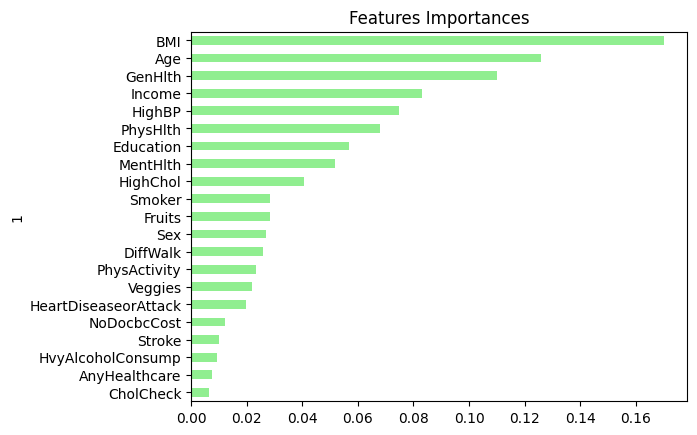

In [34]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [35]:
column =  ['Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','PhysHlth', 'DiffWalk']
# Drop the specified columns
df_features = df.drop(columns=column)

# Display the first few rows of the DataFrame after dropping columns
df_features.head()
# Export the DataFrame to a CSV file
df_features.to_csv('/content/modified_dataset.csv', index=False)